<a href="https://colab.research.google.com/github/ariahosseini/TradML/blob/main/ML_PyCaret_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from pycaret.classification import *
from pycaret.datasets import get_data
from pycaret.utils import version
version()

'3.0.4'

In [ ]:
dataset = get_data('credit')
dataset.info()
dataset = dataset.sample(5000)
data = dataset.sample(frac=0.9, random_state=123)
data_unseen = dataset.drop(data.index)
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  24000 non-null  int64  
 1   SEX        24000 non-null  int64  
 2   EDUCATION  24000 non-null  int64  
 3   MARRIAGE   24000 non-null  int64  
 4   AGE        24000 non-null  int64  
 5   PAY_1      24000 non-null  int64  
 6   PAY_2      24000 non-null  int64  
 7   PAY_3      24000 non-null  int64  
 8   PAY_4      24000 non-null  int64  
 9   PAY_5      24000 non-null  int64  
 10  PAY_6      24000 non-null  int64  
 11  BILL_AMT1  24000 non-null  float64
 12  BILL_AMT2  24000 non-null  float64
 13  BILL_AMT3  24000 non-null  float64
 14  BILL_AMT4  24000 non-null  float64
 15  BILL_AMT5  24000 non-null  float64
 16  BILL_AMT6  24000 non-null  float64
 17  PAY_AMT1   24000 non-null  float64
 18  PAY_AMT2   24000 non-null  float64
 19  PAY_AMT3   24000 non-null  float64
 20  PAY_AM

In [ ]:
data.nunique()

LIMIT_BAL      67
SEX             2
EDUCATION       6
MARRIAGE        4
AGE            49
PAY_1          10
PAY_2           9
PAY_3          10
PAY_4           9
PAY_5           8
PAY_6           8
BILL_AMT1    3940
BILL_AMT2    3857
BILL_AMT3    3805
BILL_AMT4    3728
BILL_AMT5    3684
BILL_AMT6    3614
PAY_AMT1     2017
PAY_AMT2     1992
PAY_AMT3     1924
PAY_AMT4     1788
PAY_AMT5     1718
PAY_AMT6     1722
default         2
dtype: int64

In [ ]:
for col in data.columns:
    print(col, end=":\n")
    print(data[col].unique())

LIMIT_BAL:
[ 210000  320000  500000  150000   70000   80000  100000  240000  220000
   50000  180000  160000  420000   10000  290000  380000  360000  140000
  300000  120000  130000  260000  200000  450000   30000  400000   20000
  270000  280000  390000  190000  410000   60000  170000  440000  230000
  350000   40000   90000  310000  340000  490000  250000  330000  430000
  470000  480000  110000  530000  370000  460000 1000000  550000  750000
  600000  630000  620000  520000  580000  510000  670000  700000  610000
  540000  760000  570000  560000]
SEX:
[2 1]
EDUCATION:
[1 4 3 2 5 6]
MARRIAGE:
[1 3 2 0]
AGE:
[40 32 38 47 33 28 26 46 29 31 25 34 53 35 48 27 51 49 45 44 37 24 23 36
 52 58 39 50 30 41 43 22 60 56 57 42 55 54 21 63 61 59 66 62 72 65 70 64
 67]
PAY_1:
[-1 -2  0  2  1  4  3  6  5  8]
PAY_2:
[-1 -2  0  2  1  3  4  5  7]
PAY_3:
[-1 -2  0  2  1  3  4  7  5  6]
PAY_4:
[-1 -2  2  0  4  3  7  5  1]
PAY_5:
[-1  0 -2  2  4  3  7  5]
PAY_6:
[-1  0 -2  2  4  7  3  6]
BILL_AMT1:
[3.16

In [ ]:
categoricals = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6' ]
numericals   = ['AGE','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
exp = ClassificationExperiment()
exp.setup(data, target='default', session_id=555, train_size=0.7, categorical_features= categoricals,
          numeric_features=numericals, numeric_imputation='mean', categorical_imputation='mode',
          preprocess=True, normalize=True, transformation=True ,
          group_features = [['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'],
                            ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']],
          remove_multicollinearity=True, multicollinearity_threshold=0.95, remove_outliers=False)

,Description,Value
0,Session id,555
1,Target,default
2,Target type,Binary
3,Original data shape,"(4500, 24)"
4,Transformed data shape,"(4500, 80)"
5,Transformed train set shape,"(3150, 80)"
6,Transformed test set shape,"(1350, 80)"
7,Ordinal features,1
8,Numeric features,13
9,Categorical features,9


In [ ]:
top_three_exps = exp.compare_models(n_select=3)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8168,0.7393,0.3358,0.6529,0.4409,0.3456,0.3739,0.3240
ridge,Ridge Classifier,0.8165,0.0000,0.3110,0.6663,0.4214,0.3302,0.3649,0.3070
lr,Logistic Regression,0.8156,0.7370,0.3081,0.6616,0.4178,0.3263,0.3608,0.4890
gbc,Gradient Boosting Classifier,0.8048,0.7313,0.2905,0.6064,0.3901,0.2917,0.3206,0.3850
ada,Ada Boost Classifier,0.8044,0.7169,0.2715,0.6144,0.3742,0.2793,0.3128,0.3560
rf,Random Forest Classifier,0.8006,0.7123,0.2613,0.6012,0.3616,0.2650,0.2985,0.3940
et,Extra Trees Classifier,0.7997,0.6989,0.3110,0.5738,0.4008,0.2939,0.3148,0.4010
nb,Naive Bayes,0.7940,0.7331,0.1477,0.5939,0.2289,0.1623,0.2156,0.3400
lightgbm,Light Gradient Boosting Machine,0.7924,0.7073,0.2788,0.5409,0.3663,0.2582,0.2787,0.3580
knn,K Neighbors Classifier,0.7905,0.6711,0.3008,0.5332,0.3831,0.2690,0.2856,0.4260


[LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=None, solver='svd',
                            store_covariance=False, tol=0.0001),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, positive=False, random_state=555, solver='auto',
                 tol=0.0001),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=555, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False)]

In [ ]:
rf = exp.create_model('rf', return_train_score = True)

In [ ]:
tuned_rf = exp.tune_model(rf, optimize = 'f1', return_train_score = True)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


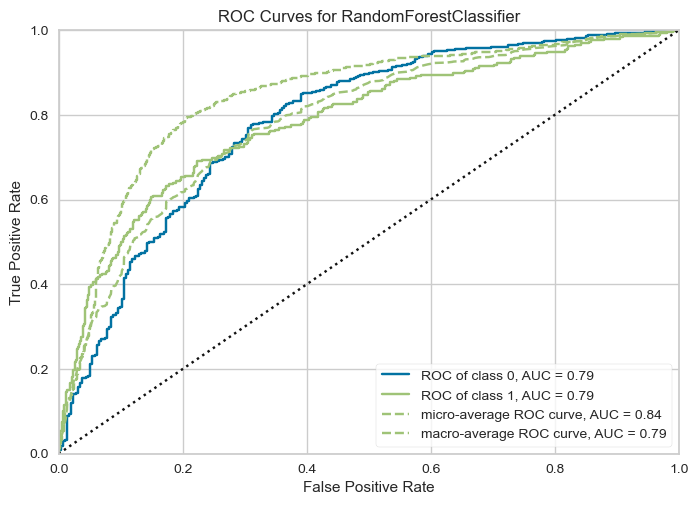

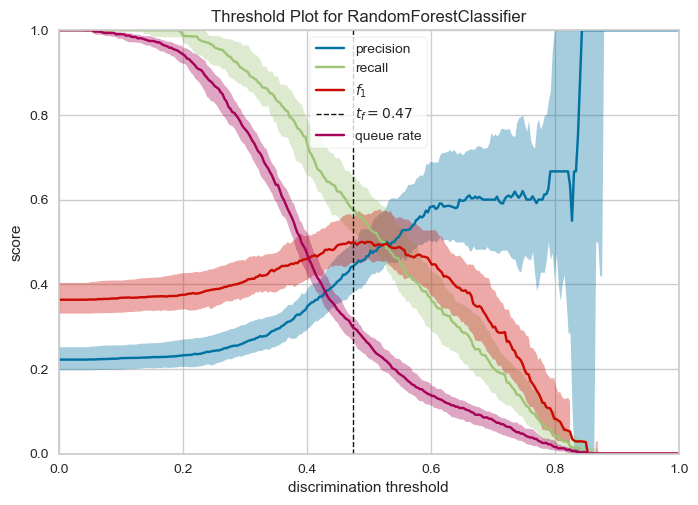

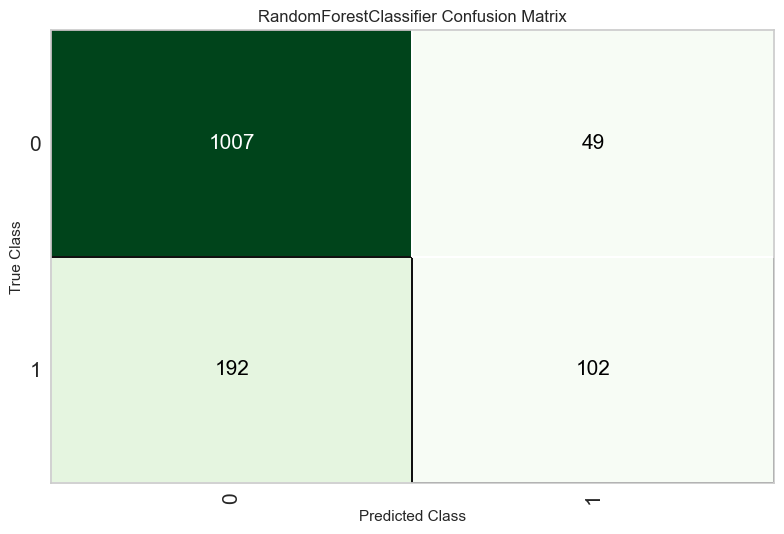

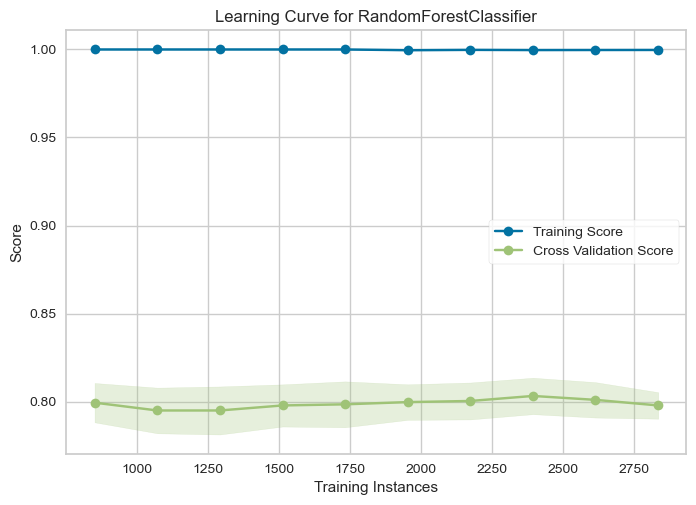

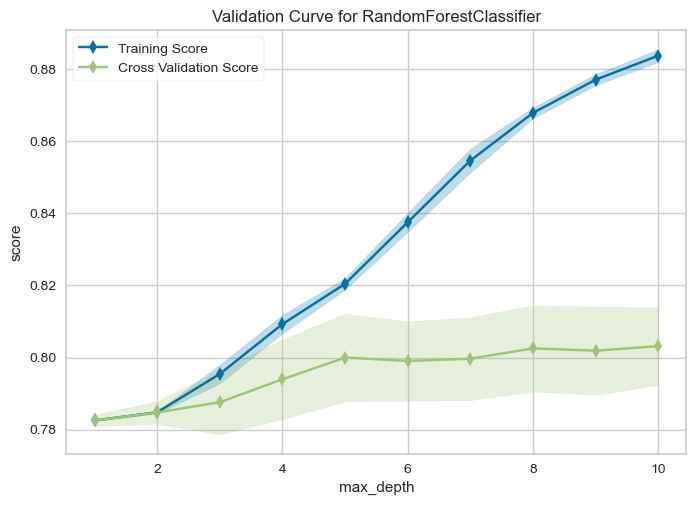

In [ ]:
exp.plot_model(tuned_rf, plot = "auc")
exp.plot_model(tuned_rf, plot = "threshold")
exp.plot_model(rf, plot = 'confusion_matrix')
exp.plot_model(rf, plot = 'learning')
exp.plot_model(rf, plot = 'vc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8032,0.7389,0.1884,0.6842,0.2955,0.2219,0.2849
1,0.7937,0.7049,0.2319,0.5714,0.3299,0.2329,0.2661
2,0.7873,0.7359,0.1594,0.5500,0.2472,0.1650,0.2083
3,0.7937,0.7371,0.2319,0.5714,0.3299,0.2329,0.2661
4,0.8063,0.7338,0.2319,0.6667,0.3441,0.2605,0.3108
5,0.8000,0.7359,0.2941,0.5714,0.3883,0.2832,0.3055
6,0.8032,0.7156,0.2353,0.6154,0.3404,0.2510,0.2913
7,0.8063,0.7474,0.2059,0.6667,0.3146,0.2369,0.2928
8,0.7841,0.7013,0.1029,0.5000,0.1707,0.1047,0.1489


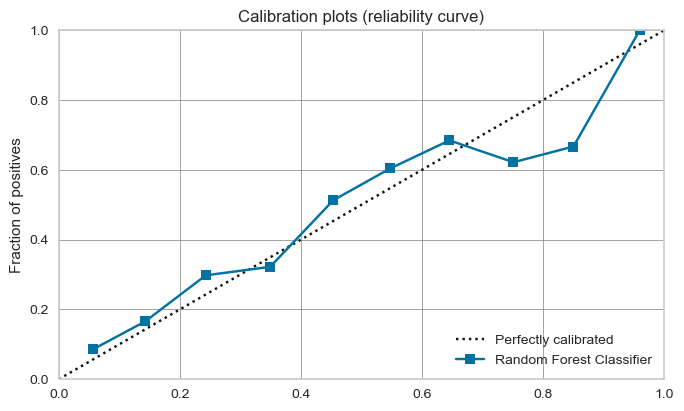

In [ ]:
calibrated_rf = exp.calibrate_model(rf)
exp.plot_model(calibrated_rf, plot='calibration')

In [ ]:
dt = exp.create_model('dt')
xgboost = exp.create_model('xgboost')
bagged_dt = exp.ensemble_model(dt)
boosted_dt = exp.ensemble_model(dt, method = 'Boosting')

blender = exp.blend_models(estimator_list = top_three_exps)
stacker = exp.stack_models(estimator_list=top_three_exps, restack=True)
tuned_top_exps = [exp.tune_model(i) for i in top_three_exps]
AUC_model = exp.automl(optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7365,0.6123,0.3913,0.3971,0.3942,0.2258,0.2258
1,0.7048,0.5868,0.3768,0.3421,0.3586,0.1674,0.1678
2,0.7175,0.5727,0.3188,0.3438,0.3308,0.1521,0.1522
3,0.6857,0.5172,0.2174,0.2500,0.2326,0.0362,0.0363
4,0.7270,0.5997,0.3768,0.3768,0.3768,0.2020,0.2020
5,0.7206,0.6407,0.5000,0.3864,0.4359,0.2543,0.2580
6,0.7175,0.5907,0.3676,0.3521,0.3597,0.1786,0.1786
7,0.7333,0.5955,0.3529,0.3750,0.3636,0.1952,0.1953
8,0.7143,0.6100,0.4265,0.3625,0.3919,0.2068,0.2079


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7937,0.6848,0.2899,0.5556,0.3810,0.2715,0.2923
1,0.7841,0.6868,0.2899,0.5128,0.3704,0.2520,0.2670
2,0.7778,0.6906,0.2464,0.4857,0.3269,0.2105,0.2280
3,0.7841,0.7085,0.3188,0.5116,0.3929,0.2701,0.2813
4,0.7937,0.7031,0.3188,0.5500,0.4037,0.2894,0.3052
5,0.7841,0.6856,0.3824,0.5000,0.4333,0.3029,0.3071
6,0.7841,0.6909,0.2353,0.5000,0.3200,0.2110,0.2322
7,0.8032,0.7481,0.3088,0.5833,0.4038,0.2991,0.3208
8,0.7651,0.6653,0.2353,0.4211,0.3019,0.1740,0.1847


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.6882,0.2609,0.6000,0.3636,0.2662,0.2988
1,0.7841,0.6679,0.2464,0.5152,0.3333,0.2232,0.2449
2,0.7810,0.6672,0.2464,0.5000,0.3301,0.2168,0.2363
3,0.7873,0.6978,0.2609,0.5294,0.3495,0.2395,0.2610
4,0.7873,0.6919,0.2899,0.5263,0.3738,0.2585,0.2752
5,0.7778,0.7061,0.3235,0.4783,0.3860,0.2564,0.2637
6,0.7937,0.6858,0.2794,0.5429,0.3689,0.2604,0.2810
7,0.7905,0.6950,0.2206,0.5357,0.3125,0.2135,0.2428
8,0.7841,0.7022,0.1912,0.5000,0.2766,0.1785,0.2071


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.6205,0.3333,0.3433,0.3382,0.1561,0.1561
1,0.7111,0.6141,0.2899,0.3226,0.3053,0.1236,0.1239
2,0.7492,0.6299,0.3188,0.4074,0.3577,0.2048,0.2071
3,0.6730,0.5352,0.2899,0.2703,0.2797,0.0686,0.0686
4,0.7492,0.6360,0.3188,0.4074,0.3577,0.2048,0.2071
5,0.7016,0.6506,0.4412,0.3488,0.3896,0.1957,0.1980
6,0.7238,0.5948,0.3676,0.3623,0.3650,0.1885,0.1885
7,0.7238,0.6468,0.3676,0.3623,0.3650,0.1885,0.1885
8,0.7302,0.6091,0.3235,0.3607,0.3411,0.1721,0.1725


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.0000,0.3188,0.7333,0.4444,0.3594,0.4034
1,0.8063,0.0000,0.2609,0.6429,0.3711,0.2801,0.3201
2,0.8254,0.0000,0.3333,0.7188,0.4554,0.3677,0.4063
3,0.8095,0.0000,0.3188,0.6286,0.4231,0.3233,0.3501
4,0.8063,0.0000,0.3478,0.6000,0.4404,0.3332,0.3513
5,0.8317,0.0000,0.4559,0.6596,0.5391,0.4404,0.4516
6,0.8254,0.0000,0.3529,0.6857,0.4660,0.3742,0.4038
7,0.8381,0.0000,0.3529,0.7742,0.4848,0.4043,0.4483
8,0.8127,0.0000,0.2941,0.6452,0.4040,0.3109,0.3447


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8317,0.7268,0.3188,0.7857,0.4536,0.3745,0.4279
1,0.7968,0.7192,0.2174,0.6000,0.3191,0.2294,0.2704
2,0.8159,0.7579,0.3043,0.6774,0.4200,0.3289,0.3661
3,0.8095,0.7595,0.3333,0.6216,0.4340,0.3318,0.3551
4,0.8000,0.7356,0.3333,0.5750,0.4220,0.3113,0.3282
5,0.8444,0.7532,0.4559,0.7209,0.5586,0.4699,0.4881
6,0.8317,0.7484,0.3676,0.7143,0.4854,0.3970,0.4283
7,0.8349,0.7715,0.3676,0.7353,0.4902,0.4045,0.4392
8,0.8063,0.6805,0.2794,0.6129,0.3838,0.2875,0.3188


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8286,0.7272,0.3333,0.7419,0.4600,0.3751,0.4177
1,0.8032,0.7161,0.2609,0.6207,0.3673,0.2731,0.3092
2,0.8222,0.7549,0.3333,0.6970,0.4510,0.3603,0.3953
3,0.8032,0.7689,0.3478,0.5854,0.4364,0.3264,0.3426
4,0.8063,0.7494,0.3478,0.6000,0.4404,0.3332,0.3513
5,0.8349,0.7604,0.4706,0.6667,0.5517,0.4542,0.4646
6,0.8286,0.7436,0.3676,0.6944,0.4808,0.3895,0.4178
7,0.8381,0.7710,0.3676,0.7576,0.4950,0.4121,0.4504
8,0.8159,0.6971,0.3235,0.6471,0.4314,0.3358,0.3646


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.0000,0.3188,0.7333,0.4444,0.3594,0.4034
1,0.8000,0.0000,0.2319,0.6154,0.3368,0.2465,0.2874
2,0.8254,0.0000,0.3188,0.7333,0.4444,0.3594,0.4034
3,0.8063,0.0000,0.3188,0.6111,0.4190,0.3164,0.3405
4,0.8127,0.0000,0.3478,0.6316,0.4486,0.3470,0.3694
5,0.8413,0.0000,0.4559,0.7045,0.5536,0.4624,0.4786
6,0.8254,0.0000,0.3382,0.6970,0.4554,0.3660,0.4000
7,0.8317,0.0000,0.3088,0.7778,0.4421,0.3641,0.4182
8,0.8063,0.0000,0.2647,0.6207,0.3711,0.2779,0.3133


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8222,0.7222,0.3043,0.7241,0.4286,0.3435,0.3889
1,0.8063,0.7186,0.2609,0.6429,0.3711,0.2801,0.3201
2,0.8254,0.7664,0.3188,0.7333,0.4444,0.3594,0.4034
3,0.8095,0.7663,0.3188,0.6286,0.4231,0.3233,0.3501
4,0.8063,0.7542,0.3188,0.6111,0.4190,0.3164,0.3405
5,0.8413,0.7619,0.4559,0.7045,0.5536,0.4624,0.4786
6,0.8286,0.7393,0.3529,0.7059,0.4706,0.3816,0.4143
7,0.8349,0.7593,0.3382,0.7667,0.4694,0.3886,0.4343
8,0.8095,0.6918,0.2794,0.6333,0.3878,0.2945,0.3292


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7587,0.6817,0.4638,0.4507,0.4571,0.3021,0.3021
1,0.7397,0.7063,0.4638,0.4156,0.4384,0.2696,0.2703
2,0.7397,0.6680,0.4203,0.4085,0.4143,0.2470,0.2470
3,0.7460,0.7084,0.4493,0.4247,0.4366,0.2729,0.2730
4,0.7143,0.6622,0.4058,0.3636,0.3836,0.1983,0.1988
5,0.7302,0.6979,0.5000,0.4000,0.4444,0.2691,0.2721
6,0.7492,0.7071,0.4706,0.4267,0.4476,0.2858,0.2864
7,0.7746,0.7255,0.4853,0.4783,0.4818,0.3377,0.3378
8,0.7429,0.6642,0.4265,0.4085,0.4173,0.2524,0.2525


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7587,0.6817,0.4638,0.4507,0.4571,0.3021,0.3021
1,0.7397,0.7063,0.4638,0.4156,0.4384,0.2696,0.2703
2,0.7397,0.6680,0.4203,0.4085,0.4143,0.2470,0.2470
3,0.7460,0.7084,0.4493,0.4247,0.4366,0.2729,0.2730
4,0.7143,0.6622,0.4058,0.3636,0.3836,0.1983,0.1988
5,0.7302,0.6979,0.5000,0.4000,0.4444,0.2691,0.2721
6,0.7492,0.7071,0.4706,0.4267,0.4476,0.2858,0.2864
7,0.7746,0.7255,0.4853,0.4783,0.4818,0.3377,0.3378
8,0.7429,0.6642,0.4265,0.4085,0.4173,0.2524,0.2525


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
pred = exp.predict_model(blender)
final_model = exp.finalize_model(blender)
unseen_predictions = exp.predict_model(final_model, data=data_unseen)
unseen_predictions.tail()
# exp.save_model(final_model, 'clf')
# clf = load_model('clf')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8163,0.6482,0.3503,0.6438,0.4537,0.3547,0.3784


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8160,0.6717,0.3983,0.6912,0.5054,0.4022,0.4253


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,prediction_label
495,240000,2,1,2,31,0,0,0,0,0,...,78659.0,81212.0,4000.0,3167.0,2767.0,8233.0,4000.0,4000.0,0,0
496,240000,2,2,1,44,-2,-1,-1,2,2,...,2714.0,2202.0,1411.0,1200.0,0.0,1479.0,0.0,0.0,0,0
497,50000,1,2,2,31,0,0,0,0,0,...,5290.0,41302.0,1813.0,2079.0,2650.0,106.0,41302.0,2000.0,1,0
498,20000,1,2,2,44,0,0,0,0,0,...,19155.0,10200.0,1375.0,1122.0,565.0,1000.0,204.0,0.0,1,0
499,290000,2,1,1,29,0,0,0,0,0,...,91746.0,76547.0,5071.0,4539.0,3000.0,3500.0,3856.0,3000.0,0,0
